In [2]:
import os
import json
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import web3


ssh -L 127.0.0.1:8545:127.0.0.1:9545 lukasw@ethsync1.sec.univie.ac.at - Erigon Node
ssh -L 127.0.0.1:8546:127.0.0.1:8540 lukasw@ether1.sec.univie.ac.at - Geth Node

In [5]:
web3_geth = web3.Web3(web3.Web3.HTTPProvider("http://127.0.0.1:8546",request_kwargs={'timeout': 3600}))
web3_geth.isConnected()

True

In [2]:
web3_erigon = web3.Web3(web3.Web3.HTTPProvider("http://127.0.0.1:8545",request_kwargs={'timeout': 3600}))
web3_erigon.isConnected()

True

In [23]:
web3 = web3.Web3(web3.Web3.HTTPProvider("http://127.0.0.1:8547",request_kwargs={'timeout': 3600}))
web3.isConnected()

True

### Block 13

In [16]:
block_13 = web3_erigon.eth.get_block(15537413)

In [20]:
block_13

AttributeDict({'baseFeePerGas': 211627987110,
 'difficulty': 8589097157490052,
 'extraData': HexBytes('0x224c75786f7220546563682f474e2f43414e2f626561737422'),
 'gasLimit': 30000000,
 'gasUsed': 29621470,
 'hash': HexBytes('0x213e6c152d1119494b9a762d6d9f300a0c84732a6d2ae9b43e9d3bfa36f3c803'),
 'logsBloom': HexBytes('0x4c221100507000000808000080101021120004020031602205010a40012a010c12200040045803200002982410020140121808a00800a10540122308202809010882c2400102003858002028401820200204108000400120810220200c14d00015101000020a0c10050423c80120b860070b008080000c4800a5005600090044010021080203000090c102000181023412011003232400a882203560009188808b020810004a201124000080024a02002800026008400203a000000088024108001404221000014000a0160100045004011802628c0a843000010886218022001412200102000008001202008800008000652000481806005020284446000024'),
 'miner': '0x26B3eEA1CD34a4aFF7Ce828A5F71DAAC042d38E0',
 'mixHash': HexBytes('0x8510d582834c78aed22262b4534696c3e008d8982c97f2d1b79f188f4f94b221'),
 'nonce': HexByte

In [27]:
block_14 = web3_erigon.eth.get_block(15537414)

In [28]:
block_14

AttributeDict({'baseFeePerGas': 237413922649,
 'difficulty': 8174451298757370,
 'extraData': HexBytes('0x224c75786f7220546563682f474e2f43414e2f626561737422'),
 'gasLimit': 30000000,
 'gasUsed': 6957758,
 'hash': HexBytes('0x2f9fdac4a9d99e4c2c2825583f6279ffa206ea95187cf752121f7f76d5a4de5b'),
 'logsBloom': HexBytes('0x0000110440000000200080000000020100000000000000000080000000084000100000c010100080040000210400014002600020080230800204000000000000000080000000000808000008008000000001000040000060200000000000500040000000028004000100000002002801000000800000004000800014009800400000000843800000000900004080000400000008410000010004000400900000000208000202201000000080000000000000000000000000001800000002000000040002000040000000000000001000001000000400200300004000000020006000200000004000000000008000000000010004000002008000000000000020'),
 'miner': '0x26B3eEA1CD34a4aFF7Ce828A5F71DAAC042d38E0',
 'mixHash': HexBytes('0x3c162476b76eb0f69004c1206a8e6fa7f6d17a3e4247b48d103c36ff9ff2b4f6'),
 'nonce': HexBytes

In [17]:
counter_status = 0

In [18]:
for hash_ in (block_13["transactions"]):
    tx_status = None
    try:
        tx_status = web3_geth.eth.get_transaction(hash_)
    except Exception as ex:
        counter_status += 1


In [19]:
counter_status

1

In [10]:
block_13

AttributeDict({'baseFeePerGas': 211627987110,
 'difficulty': 8589097157490052,
 'extraData': HexBytes('0x224c75786f7220546563682f474e2f43414e2f626561737422'),
 'gasLimit': 30000000,
 'gasUsed': 29621470,
 'hash': HexBytes('0x213e6c152d1119494b9a762d6d9f300a0c84732a6d2ae9b43e9d3bfa36f3c803'),
 'logsBloom': HexBytes('0x4c221100507000000808000080101021120004020031602205010a40012a010c12200040045803200002982410020140121808a00800a10540122308202809010882c2400102003858002028401820200204108000400120810220200c14d00015101000020a0c10050423c80120b860070b008080000c4800a5005600090044010021080203000090c102000181023412011003232400a882203560009188808b020810004a201124000080024a02002800026008400203a000000088024108001404221000014000a0160100045004011802628c0a843000010886218022001412200102000008001202008800008000652000481806005020284446000024'),
 'miner': '0x26B3eEA1CD34a4aFF7Ce828A5F71DAAC042d38E0',
 'mixHash': HexBytes('0x8510d582834c78aed22262b4534696c3e008d8982c97f2d1b79f188f4f94b221'),
 'nonce': HexByte

In [2]:
len(os.listdir("blocks_json"))

28

In [35]:
f = open("data.json", encoding="utf-8")
file = json.load(f)
data = json.loads(file)

In [23]:
data

[{'number': 15537393,
  'timestamp': '2022-09-15 06:42:42',
  'difficulty': 11055787484078698,
  'miner': '0x5b310960a7922092fdcb9295ece336012f9cf87e',
  'ts': 1663224162,
  'hash': '0x8bd09ca00e65bb652557f8c5a74087be57bba5aa9274d901486e3a4132126733',
  'transactions': 37,
  'tx_failed': 2,
  'tx_success': 35},
 {'number': 15537393,
  'timestamp': '2022-09-15 06:42:42',
  'difficulty': 11055787484078698,
  'miner': '0x829bd824b016326a401d083b33d092293333a830',
  'ts': 1663224162,
  'hash': '0x55b11b918355b1ef9c5db810302ebad0bf2544255b530cdce90674d5887bb286',
  'transactions': 1,
  'tx_failed': 0,
  'tx_success': 1},
 {'number': 15537394,
  'timestamp': '2022-09-15 06:42:51',
  'difficulty': 11056337239892586,
  'miner': '0xea674fdde714fd979de3edf0f56aa9716b898ec8',
  'ts': 1663224171,
  'hash': '0xb84f2d01561bdeaee65b05f2ae01613b7f0c9b96dad11d7c150900c8d6b2e97c',
  'transactions': 76,
  'tx_failed': 4,
  'tx_success': 72},
 {'number': 15537395,
  'timestamp': '2022-09-15 06:42:53',
  '

In [24]:
all_txs = [c['transactions'] for c in data]
sum(all_txs)

6708

In [25]:
failed_txs = sum([c['tx_failed'] for c in data])
failed_txs

470

In [26]:
success_txs = sum([c['tx_success'] for c in data])
success_txs

6238

### Pie Chart for Transactions

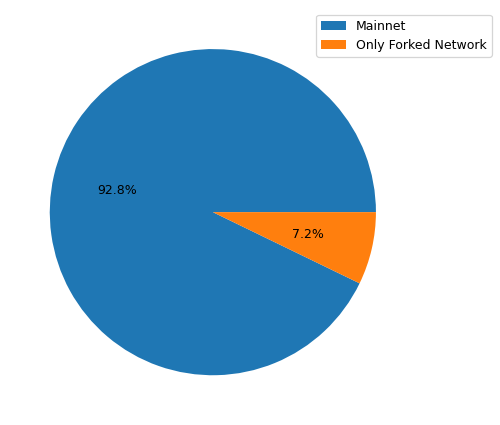

In [286]:
labels=["Mainnet", "Only Forked Network"]
plt.figure(figsize=(5,5))
plt.pie([success_txs, failed_txs], autopct='%.1f%%')
plt.legend(labels, bbox_to_anchor=(1.2, 1), loc='upper right')

fig = plt.gcf()
fig.set_dpi(90)
fig.set_figwidth(10)
fig.set_figheight(6)
plt.savefig("graphs/transaction_amount.png", dpi=300)

In [11]:
blocks = []

In [220]:
class Transaction:
    def __init__(self, block_number=None, hash=None, sender=None, receiver=None, value=None, gas=None, gas_price=None, status=None):
        self.block_number = block_number
        self.hash = hash
        self.sender = sender
        self.receiver = receiver
        self.value = value
        self.gas = gas
        self.gas_price = gas_price
        self.status = status

In [ ]:

class Block:
    def __init__(self, number, timestamp, difficulty, miner, ts, hash, transactions):
        self.number = number
        self.timestamp = timestamp
        self.difficulty = difficulty
        self.miner = miner
        self.ts = ts
        self.hash = hash
        self.transaction_hashes = transactions
        self.tx_failed = 0
        self.tx_success = 0
        self.transactions = []

    def checkTransactionStatus(self, tx):
        tx_status = None
        try:
            tx_status = web3.eth.get_transaction(tx['hash'])
        except Exception as ex:
            print("failed")

        transaction = Transaction(self.number, tx['hash'])

        if tx_status is None:
            transaction.status = False
            self.tx_failed += 1
        else:
            transaction.status = True
            self.tx_success += 1
        self.transactions.append(transaction)

    def __repr__(self):
        return str(self)

    def __str__(self):
        return str(self.number) + " " + self.timestamp + " " + str(self.transactions)




In [ ]:
for index, filename in enumerate(sorted(os.listdir("blocks_json"))):
    f = open("blocks_json/" + filename)
    data = json.load(f)
    miner_ = data['Header']['miner']
    ts_ = int((data['Header']['timestamp']), 16)
    difficulty_ = int((data['Header']['difficulty']), 16)
    number_ = int((data['Header']['number']), 16)
    hash_ = data['Header']['hash']
    transactions_ = data['Body']['Transactions']
    block = Block(number_,
                  datetime.utcfromtimestamp(ts_).strftime('%Y-%m-%d %H:%M:%S'),
                  difficulty_,
                  miner_,
                  ts_,
                  hash_,
                  len(transactions_))

    for tx in transactions_:
        block.checkTransactionStatus(tx)

    blocks.append(block)

In [ ]:
df = pd.DataFrame()

for index, block in enumerate(blocks):
    for tx in block.transactions:
        df = df.append(tx.__dict__, ignore_index=True)


In [ ]:
df

In [34]:
df.to_csv("tx_mainnet.csv", index=False)

### Bar Chart for Transactions in Block

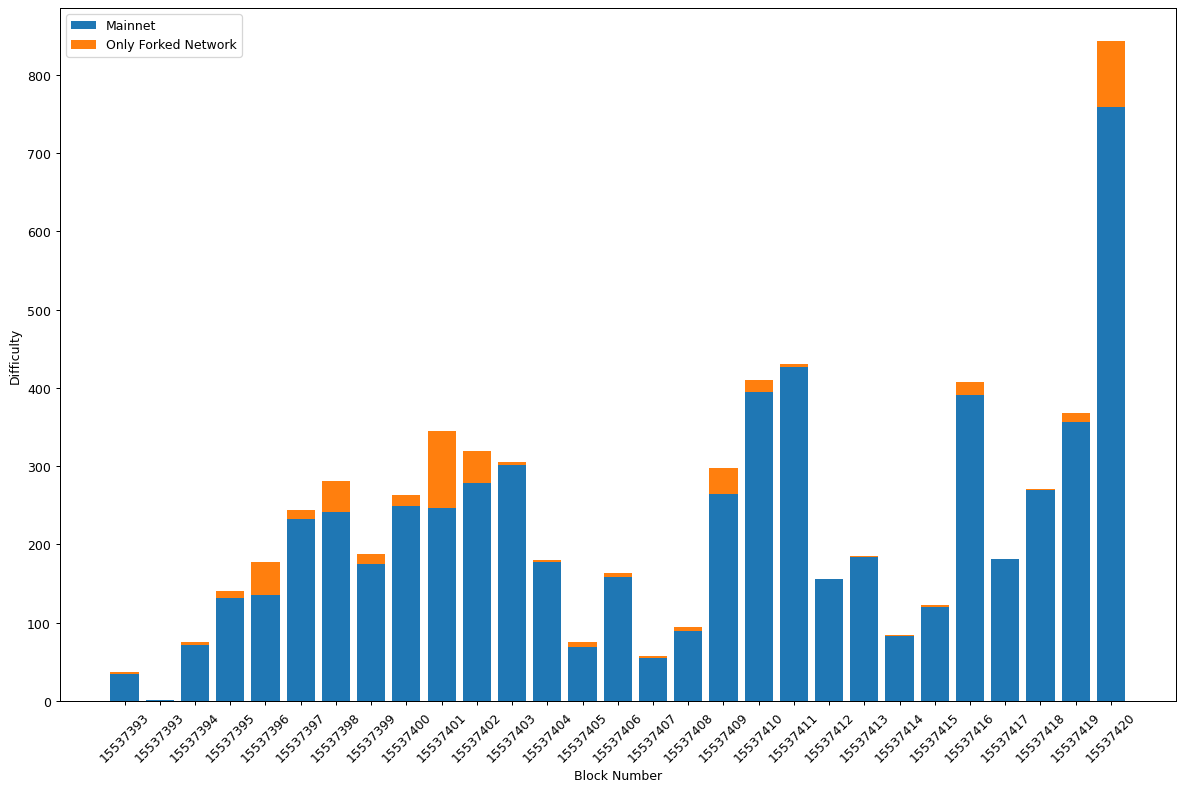

In [75]:
block_df = pd.DataFrame(data)
tick_locations = np.arange(len(block_df["number"])) + 0.5

plt.figure(facecolor='white')
plt.bar(tick_locations, block_df["tx_success"], label="Mainnet")
plt.bar(tick_locations, block_df["tx_failed"], bottom=block_df["tx_success"], label="Only Forked Network")
plt.legend()
plt.ylabel('Difficulty')
plt.xlabel('Block Number')
plt.xticks(tick_locations, block_df["number"], rotation=45)

ax = plt.gca()

fig = plt.gcf()

fig.set_dpi(90)
fig.set_figwidth(16)
fig.set_figheight(10)
fig.savefig("graphs/transaction_amount_bar.png", dpi=600)

### How many transactions were in the main network?


In [3]:
amount = 0

In [4]:
for block_index_mainnet in range(15537393, 15537420):
    transactions = web3_geth.eth.get_block_transaction_count(block_index_mainnet)
    amount += transactions

In [5]:
amount

3368

### Difficulty line graph

In [38]:
block_df["difficulty"]

0     11055787484078698
1     11055787484078698
2     11056337239892586
3     11062285597874390
4     11062835353688278
5     11052581559352080
6     11053131315165968
7     11015901813554975
8     10957284127987474
9     10963184120191980
10    10894143351805437
11    10548931721941955
12    10523727249919073
13    10462614541377973
14    10299685944982837
15    10229827691407203
16    10140466852277099
17     9947912014712680
18     9623017383326557
19     9158391982426947
20     8716226500809104
21     8589097157490052
22     8174451298757370
23     8135086741589048
24     7742387675421877
25     7368671620754004
26     7013020941775613
27     6804686773054215
28     6476299033491008
Name: difficulty, dtype: int64

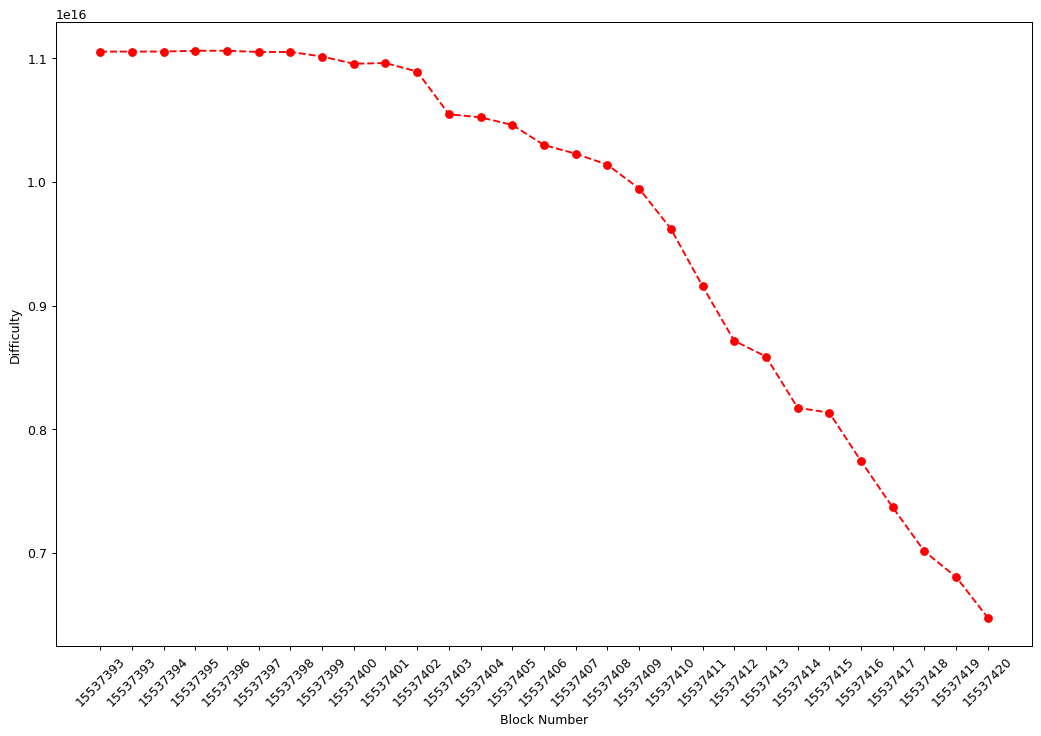

In [69]:
tick_locations = np.arange(len(block_df["number"])) + 0.5

plt.figure(facecolor='white')
plt.plot(tick_locations, block_df["difficulty"], linestyle='dashed', color='red', marker='o')
plt.xlabel("Block Number")
plt.ylabel('Difficulty')

plt.xticks(tick_locations, block_df["number"], rotation=45)


fig = plt.gcf()
fig.set_dpi(90)
fig.set_figwidth(14)
fig.set_figheight(9)
fig.savefig("graphs/difficulty_line_graph.png", dpi=600)

In [225]:
def addTransaction(tx_hash):
    try:
        tx_ = web3_geth.eth.get_transaction(tx_hash)
    except Exception as ex:
        print("Transaction not found: " + tx_hash)
        return Transaction(hash=tx_hash, status="FAILED").__dict__

    transaction_ = Transaction(
        block_number=tx_['blockNumber'],
        hash=tx_hash,
        sender=tx_['from'],
        receiver=tx_['to'],
        gas=tx_['gas'],
        gas_price=tx_['gasPrice'],
        value=tx_['value']
    )
    return transaction_.__dict__


In [226]:
df = pd.read_csv("tx_mainnet.csv")

In [235]:
txs_df = pd.DataFrame()
for item in df['hash']:
    txs_df = txs_df.append(addTransaction(item), ignore_index=True)
print(1)

1


weird transaction = 0x96e5765be9d80f803bc7ff6477574ce2449b4f2283a4dfe8ad150fd812d133af

In [240]:
txs_df.sort_values("block_number", ascending=False)

,block_number,hash,sender,receiver,value,gas,gas_price,status
660,15697654,0xf86ac467e225ea60d11473ae9d5f95465dfa7af69b83...,0xAE62993477095e5b09e4cA9aa7732F34D25197AC,0x69af81e73A73B40adF4f3d4223Cd9b1ECE623074,0,100000,491000000000,None
593,15697591,0xda22e165b63e103e19987f84f77ac4febda9b9a26efa...,0xD3029c25146d86eEb21e8194919Ea9bF06321D84,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,0,100000,562000000000,None
618,15697572,0x9f838e66d2cb6f3caf16abc763c588d51fb0a1dc576d...,0x8F2bf3E898a900103291dA600a914a44Ce96DD1b,0x0e712d04E2E67D6129DC45153473046117874f95,970000000000000000,21033,507000000000,None
602,15697570,0xce34742642f615d2554b7a3b0f82a51b3696ce367935...,0x21EDe333Ea55238084553f7079313f4b26A3cf5d,0x1f9840a85d5aF5bf1D1762F925BDADdC4201F984,0,85809,553948500111,None
1121,15697569,0x80da234b28fd94725d01dc8eba0f96693915b3800b79...,0xf7b7DD2cC91CDC39799E8AA9Bada6bb6C99BBE5F,0x934cdc04C434b8dBf3E1265F4f198D70566f7355,100000000000000000,500000,83831349046,None
...,...,...,...,...,...,...,...,...
6195,None,0x7913562dcff74acbfbb1be195d69e02f5fbeceeb7ed1...,None,None,None,None,None,FAILED
6217,None,0x11fe9d82691453061675462dece4c9b653baae029b8c...,None,None,None,None,None,FAILED
6283,None,0x050bd7b1bb7e094650b67d1cd2c9f95cd5963c44e19f...,None,None,None,None,None,FAILED
6286,None,0x1f0f1f9c0c01aab389ef98f714d0726cb4d659d821f9...,None,None,None,None,None,FAILED


In [228]:
total_amount = txs_df["value"].sum()
total_amount

123027408034799062376379

In [165]:
df["hash"] = df["hash"].astype(str)
txs_df["hash"] = txs_df["hash"].astype(str)

In [167]:
df_inner = txs_df.iloc[:,:-1].merge(df.iloc[:,1:], on='hash', how='inner')

In [169]:
df_inner.to_csv("tx_fork.csv", index=False)

In [349]:
tx_fork = pd.read_csv("csv/tx_fork.csv")

### Create Pie Chart for total value of all Transactions

In [361]:
sum_all_txs = tx_fork["value"].astype(float).sum()

In [377]:
sum_fork_txs = tx_fork.loc[tx_fork["status"] == False]["value"].astype(float).sum()

In [379]:
sum_mainnet_txs = tx_fork.loc[tx_fork["status"] == True]["value"].astype(float).sum()

In [378]:
web3_erigon.fromWei(sum_fork_txs, "ether")

Decimal('4461.398243590406668288')

In [387]:
web3_erigon.fromWei(sum_mainnet_txs, "ether")

Decimal('123027.408034799070216192')

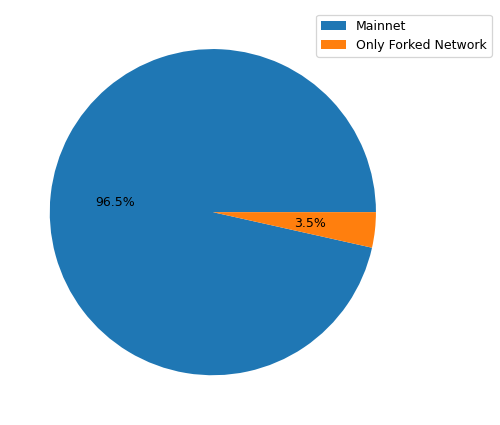

In [386]:
labels=["Mainnet", "Only Forked Network"]
plt.figure(figsize=(5,5))
plt.pie([sum_mainnet_txs, sum_fork_txs], autopct='%.1f%%')
plt.legend(labels, bbox_to_anchor=(1.2, 1), loc='upper right')

fig = plt.gcf()
fig.set_dpi(90)
fig.set_figwidth(10)
fig.set_figheight(6)
plt.savefig("graphs/transaction_amount_value.png", dpi=300)

In [354]:
failed_txs["receiver"].value_counts()[:20]

0x57C1e0C2ADf6EECDb135BcF9ec5F23b319be2c94    121
0x7Bc25283a29A3888CAb4555Ea86fF1a8C18Cc90a     44
0x881D40237659C251811CEC9c364ef91dC08D300C     20
0xbaDc0dEfAfCF6d4239BDF0b66da4D7Bd36fCF05A     19
0xBEEFBaBEeA323F07c59926295205d3b7a17E8638     13
0x00000000AE347930bD1E7B0F35588b92280f9e75     12
0xA69babEF1cA67A37Ffaf7a485DfFF3382056e78C     11
0xa57Bd00134B2850B2a1c55860c9e9ea100fDd6CF     11
0x000000000dFDe7deaF24138722987c9a6991e2D4     10
0xD51a44d3FaE010294C616388b506AcdA1bfAAE46      9
0x98C3d3183C4b8A650614ad179A1a98be0a8d6B8E      9
0x2A8bF7cb9b8970DDaE479A2d3C66459145c38D3c      8
0x0000000000007F150Bd6f54c40A34d7C3d5e9f56      7
0xcE0f25934dEAaddd174427F1978bCd487a85E9fA      6
0x114702cD1fD3940F0f74D7Ce12e7FB0865B3cDE4      5
0xF71530c1f043703085B42608ff9DCcCc43210a8E      5
0x91aaE0aAfd9D2d730111b395c6871f248d7Bd728      4
0x934383B37De628425E8461Ead970628d405D9B73      4
0x6260ac05c843498fb0627FA4020e26999D3483e5      4
0x09e0781A47e9FD2b6258Be09bd074f42022b9760      4


In [15]:
failed_txs

,block_number,hash,sender,receiver,value,gas,gas_price,status
11,15537406.0,0x594cd63263868175429fdf695367e2e3a6c88fef7175...,0x00006196242a1D328fe4B636995e796cb6c7a2Ac,0x00006196242a1D328fe4B636995e796cb6c7a2Ac,0,21000.0,1.680000e+11,False
34,15537406.0,0xab01b3401295c1c33594a77704ef25e856a2571ecff6...,0x000000Fa06eE350cf4b6C0E12eC08535e6F4dae6,0x000000Fa06eE350cf4b6C0E12eC08535e6F4dae6,0,21000.0,1.560000e+11,False
35,15537406.0,0x8b41385b961c43b5489542e7bfdec7e698ffcaca0124...,0x00000018C807a85e59897e8a799afC74f420d020,0x00000018C807a85e59897e8a799afC74f420d020,0,21000.0,1.560000e+11,False
78,15537406.0,0xe15efb5b170a6146260fa81476ea54cc26cc88481327...,0x1a19C9F103F7e2e4A5c81CE35dC057de35393f98,0xa8E7437833F4C2f4f36f8e4559Db91bea951BFa9,0,1202005.0,1.531163e+11,False
89,15537406.0,0xaff685fda8d19841b3d7f77ebf4c229d599eb582a85f...,0x000002Cba8DfB0a86A47a415592835E17fac080a,0x00000000AE347930bD1E7B0F35588b92280f9e75,0,500000.0,1.531062e+11,False
...,...,...,...,...,...,...,...,...
6267,15537398.0,0x7913562dcff74acbfbb1be195d69e02f5fbeceeb7ed1...,0xbb8eeB1b3494e123144Ce38E1aac8f7b96b5EfA5,0xbb8eeB1b3494e123144Ce38E1aac8f7b96b5EfA5,100000000000000,21000.0,8.858912e+10,False
6289,15537398.0,0x11fe9d82691453061675462dece4c9b653baae029b8c...,0x334c5c860fe5F347f7a502af7062a551B45958FB,0x7Bc25283a29A3888CAb4555Ea86fF1a8C18Cc90a,0,180000.0,9.308447e+10,False
6355,15537403.0,0x050bd7b1bb7e094650b67d1cd2c9f95cd5963c44e19f...,0xe41bb0D27E058ba99B2e202D1d8B92F9dAF96C3d,0xe41bb0D27E058ba99B2e202D1d8B92F9dAF96C3d,100000000000,21000.0,1.430296e+11,False
6358,15537403.0,0x1f0f1f9c0c01aab389ef98f714d0726cb4d659d821f9...,0xE18A59A244e6137851cA8B0EcF57456183120907,0x68b3465833fb72A70ecDF485E0e4C7bD8665Fc45,0,908937.0,1.430296e+11,False


In [36]:
test = failed_txs.dropna()

In [39]:
test["txn_fee"] = test["gas"] * test["gas_price"]

/var/folders/zx/yhwtphx12fz43b6l6qxn59n40000gn/T/ipykernel_20272/1395832485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["txn_fee"] = test["gas"] * test["gas_price"]


In [40]:
test

,block_number,hash,sender,receiver,value,gas,gas_price,status,txn_fee
11,15537406.0,0x594cd63263868175429fdf695367e2e3a6c88fef7175...,0x00006196242a1D328fe4B636995e796cb6c7a2Ac,0x00006196242a1D328fe4B636995e796cb6c7a2Ac,0,21000.0,1.680000e+11,False,3.528000e+15
34,15537406.0,0xab01b3401295c1c33594a77704ef25e856a2571ecff6...,0x000000Fa06eE350cf4b6C0E12eC08535e6F4dae6,0x000000Fa06eE350cf4b6C0E12eC08535e6F4dae6,0,21000.0,1.560000e+11,False,3.276000e+15
35,15537406.0,0x8b41385b961c43b5489542e7bfdec7e698ffcaca0124...,0x00000018C807a85e59897e8a799afC74f420d020,0x00000018C807a85e59897e8a799afC74f420d020,0,21000.0,1.560000e+11,False,3.276000e+15
78,15537406.0,0xe15efb5b170a6146260fa81476ea54cc26cc88481327...,0x1a19C9F103F7e2e4A5c81CE35dC057de35393f98,0xa8E7437833F4C2f4f36f8e4559Db91bea951BFa9,0,1202005.0,1.531163e+11,False,1.840465e+17
89,15537406.0,0xaff685fda8d19841b3d7f77ebf4c229d599eb582a85f...,0x000002Cba8DfB0a86A47a415592835E17fac080a,0x00000000AE347930bD1E7B0F35588b92280f9e75,0,500000.0,1.531062e+11,False,7.655308e+16
...,...,...,...,...,...,...,...,...,...
6267,15537398.0,0x7913562dcff74acbfbb1be195d69e02f5fbeceeb7ed1...,0xbb8eeB1b3494e123144Ce38E1aac8f7b96b5EfA5,0xbb8eeB1b3494e123144Ce38E1aac8f7b96b5EfA5,100000000000000,21000.0,8.858912e+10,False,1.860372e+15
6289,15537398.0,0x11fe9d82691453061675462dece4c9b653baae029b8c...,0x334c5c860fe5F347f7a502af7062a551B45958FB,0x7Bc25283a29A3888CAb4555Ea86fF1a8C18Cc90a,0,180000.0,9.308447e+10,False,1.675520e+16
6355,15537403.0,0x050bd7b1bb7e094650b67d1cd2c9f95cd5963c44e19f...,0xe41bb0D27E058ba99B2e202D1d8B92F9dAF96C3d,0xe41bb0D27E058ba99B2e202D1d8B92F9dAF96C3d,100000000000,21000.0,1.430296e+11,False,3.003621e+15
6358,15537403.0,0x1f0f1f9c0c01aab389ef98f714d0726cb4d659d821f9...,0xE18A59A244e6137851cA8B0EcF57456183120907,0x68b3465833fb72A70ecDF485E0e4C7bD8665Fc45,0,908937.0,1.430296e+11,False,1.300049e+17


In [41]:
test.sort_values(by="txn_fee", ascending=False, inplace=True)

/var/folders/zx/yhwtphx12fz43b6l6qxn59n40000gn/T/ipykernel_20272/1009118359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.sort_values(by="txn_fee", ascending=False, inplace=True)


In [44]:
test["txn_fee"].astype(int)

371     3039135585188366336
886     1776202411382000128
490     1758189077537999872
367     1737987742308563200
369     1649911060058296576
               ...         
2731       1680000000000000
4027       1059179180871000
4028       1059179180871000
4030       1059179180871000
4029       1059179180871000
Name: txn_fee, Length: 470, dtype: int64

In [7]:
web3.eth.get_transaction_receipt("0x74cdcf424456a2940850a86efcd2821902e0b9d00422b56d3d8cd5b4e6c49d92")

AttributeError: module 'web3.eth' has no attribute 'get_transaction_receipt'

In [12]:
web3.eth.get_transaction_count("0xF20e53b1b21b4cF9e688aa65439e4C364F51fAc9")

6762

In [165]:
block_info = pd.read_csv("blocks.csv", names=["file_creation", "hash"])

In [166]:
block_info["hash"] = block_info["hash"].astype("string")
block_info["file_creation"] = block_info["file_creation"].astype("string")

In [167]:
block_json = pd.DataFrame(data)

In [168]:
block_json["hash"] = block_json["hash"].astype("string")

In [169]:
merged = block_json.merge(block_info, on="hash")

In [171]:
merged

,number,timestamp,difficulty,miner,ts,hash,transactions,tx_failed,tx_success,file_creation
0,15537393,2022-09-15 06:42:42,11055787484078698,0x5b310960a7922092fdcb9295ece336012f9cf87e,1663224162,0x8bd09ca00e65bb652557f8c5a74087be57bba5aa9274...,37,2,35,2022-09-15 06:44:15
1,15537393,2022-09-15 06:42:42,11055787484078698,0x829bd824b016326a401d083b33d092293333a830,1663224162,0x55b11b918355b1ef9c5db810302ebad0bf2544255b53...,1,0,1,2022-09-15 06:42:50
2,15537394,2022-09-15 06:42:51,11056337239892586,0xea674fdde714fd979de3edf0f56aa9716b898ec8,1663224171,0xb84f2d01561bdeaee65b05f2ae01613b7f0c9b96dad1...,76,4,72,2022-09-15 06:42:53
3,15537395,2022-09-15 06:42:53,11062285597874390,0xc365c3315cf926351ccaf13fa7d19c8c4058c8e1,1663224173,0x37d6cb00caeb698b311709fd4a906b2537972d1827b1...,140,8,132,2022-09-15 06:43:07
4,15537396,2022-09-15 06:43:07,11062835353688278,0xea674fdde714fd979de3edf0f56aa9716b898ec8,1663224187,0xc703cc6cb885515eb89ec582431634d4247dac26e621...,178,42,136,2022-09-15 06:43:35
5,15537397,2022-09-15 06:43:34,11052581559352080,0xea674fdde714fd979de3edf0f56aa9716b898ec8,1663224214,0x428ac402e1085ac4a9b01c090128c4f508da0cc399f6...,244,11,233,2022-09-15 06:43:47
6,15537398,2022-09-15 06:43:46,11053131315165968,0x646db8ffc21e7ddc2b6327448dd9fa560df41087,1663224226,0xda15160b28fcde84c9214f6eb2c6bb6e7ed4490c9cb2...,281,40,241,2022-09-15 06:45:10
7,15537399,2022-09-15 06:45:09,11015901813554975,0x6ebaf477f83e055589c1188bcc6ddccd8c9b131a,1663224309,0x563c028f418020c683e9e15dd817107c0a4c0cda5df2...,188,13,175,2022-09-15 06:47:04
8,15537400,2022-09-15 06:47:04,10957284127987474,0xc730b028da66ebb14f20e67c68dd809fbc49890d,1663224424,0x36088dfc42bae9f47d4c0ec40c7b25ab8430b1925f3c...,263,14,249,2022-09-15 06:47:05
9,15537401,2022-09-15 06:47:05,10963184120191980,0xc365c3315cf926351ccaf13fa7d19c8c4058c8e1,1663224425,0xa0335d24dfb5bdeff9fcf5d3dbc7d5430bf181040176...,345,98,247,2022-09-15 06:49:18


### Time Series Graph

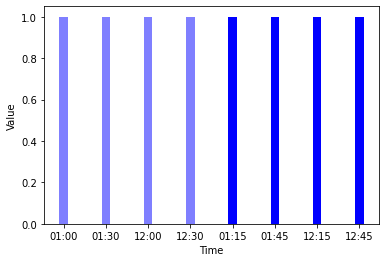

In [384]:
import matplotlib.pyplot as plt
import numpy as np

# Create some sample data
times1 = ['12:00', '12:30', '1:00', '1:30']
times2 = ['12:15', '12:45', '1:15', '1:45']
values = [1, 1, 1, 1]

# Define a function to sort the data by time
def sort_by_time(time_list):
    # Convert the times to integers
    time_list = [int(time.replace(':', '')) for time in time_list]
    # Sort the times
    time_list.sort()
    # Convert the times back to strings
    time_list = [str(time).zfill(4)[:2] + ':' + str(time).zfill(4)[2:] for time in time_list]
    return time_list

# Sort the data by time
times1 = sort_by_time(times1)
times2 = sort_by_time(times2)

# Create the plot
fig, ax = plt.subplots()

# Use the bar plot function to plot the data
ax.bar(times1, values, width=0.2, color='b', alpha=0.5)
ax.bar(times2, values, width=0.2, color='b', alpha=1.0)

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Value')

# Show the plot
plt.show()

In [173]:
miner_df = pd.DataFrame(merged, columns=["number", "miner"])

In [177]:
merged.to_csv("blocks_total.csv", index=False)

In [219]:
web3_geth.eth.get_transaction("0xd1f13adf11d130168715736372c010c115bae4ec3aed8f06b999a959f2a54bd7")

AttributeDict({'blockHash': HexBytes('0x50a876ba6d6406dd3ca6e65a370cd45eff49a92b30d5a4409346668fc3ee808f'),
 'blockNumber': 15630883,
 'from': '0xdF1C61FdCb6E04Ebd34F42ff449f15844F8aAF6c',
 'gas': 21000,
 'gasPrice': 5000000000000,
 'maxFeePerGas': 5000000000000,
 'maxPriorityFeePerGas': 5000000000000,
 'hash': HexBytes('0xd1f13adf11d130168715736372c010c115bae4ec3aed8f06b999a959f2a54bd7'),
 'input': '0x',
 'nonce': 4,
 'to': '0x0ad662E59DCFE292B7a7fBcEA8A1E4564CcdB4B9',
 'transactionIndex': 0,
 'value': 200000000000000000,
 'type': '0x2',
 'accessList': [],
 'chainId': '0x1',
 'v': 0,
 'r': HexBytes('0xa9e9f408013155befd567d16d29fb395085b21f7fe0397c49c0d627cfb78c258'),
 's': HexBytes('0x58e584a48f41e0287554b63eaebc318f582d049b4c8fd1f22180794b28d97ce4')})

In [241]:
web3_geth.eth.get_balance("0x8EB8a3b98659Cce290402893d0123abb75E3ab28", 15537420)

348267897631346249704

In [242]:
web3_erigon.eth.get_balance("0x8EB8a3b98659Cce290402893d0123abb75E3ab28", 15697654)

347752187350720998250

In [247]:
web3_geth.eth.get_transaction_count("0x8EB8a3b98659Cce290402893d0123abb75E3ab28", 15697654)

9776

In [3]:
web3_erigon.eth.get_transaction_count("0x8EB8a3b98659Cce290402893d0123abb75E3ab28", 15537420)

8038

### Transaction analysis 0xe21ac15f392c6dccc484c0e64b986cdf4b6a696139c905d4a808b16b68736b12

In [13]:
web3_geth.eth.get_transaction_count("0x235909a5345AF86536E4dDBE9f753dB6b3C919F7", 15537419)

3986

In [14]:
web3_erigon.eth.get_transaction_count("0x235909a5345AF86536E4dDBE9f753dB6b3C919F7", 15537419)


3986

In [11]:
web3_geth.eth.get_balance("0x235909a5345AF86536E4dDBE9f753dB6b3C919F7", 15537420)

6817194222120164344

In [12]:
web3_erigon.eth.get_balance("0x235909a5345AF86536E4dDBE9f753dB6b3C919F7", 15537420)

6810166488956909344

In [4]:
web3_erigon.eth.get_transaction("0xe21ac15f392c6dccc484c0e64b986cdf4b6a696139c905d4a808b16b68736b12")

AttributeDict({'blockHash': HexBytes('0x28e995257c50baa01e4456a52c30ae9208635e74ec3bf33abb1520d49ee4a4e6'),
 'blockNumber': 15537420,
 'from': '0x235909a5345AF86536E4dDBE9f753dB6b3C919F7',
 'gas': 253450,
 'gasPrice': 334653960155,
 'maxPriorityFeePerGas': 267253867708,
 'maxFeePerGas': 334653960155,
 'hash': HexBytes('0xe21ac15f392c6dccc484c0e64b986cdf4b6a696139c905d4a808b16b68736b12'),
 'input': '0x',
 'nonce': 3986,
 'to': '0x235909a5345AF86536E4dDBE9f753dB6b3C919F7',
 'transactionIndex': 784,
 'value': 17923,
 'type': '0x2',
 'accessList': [],
 'chainId': '0x1',
 'v': 0,
 'r': HexBytes('0x51faffc9d921f13efc2d634773c8e5cb7ba7a52ef6459986fe98aad063f5d374'),
 's': HexBytes('0x2f988b8af32b3706f8927e9bb632042443f6df0b3e06201974c2a29342b46e32')})

In [6]:
web3_geth.eth.get_transaction("0x1adbb0d2dff24515309a274fe420a4659108035c164d82d2b6bd79e930405f45")

AttributeDict({'blockHash': HexBytes('0xe030f1c54240b8cc26604d3aad7699bc4cc363001b904bd6cd7044a8934ebbc5'),
 'blockNumber': 15539749,
 'from': '0x235909a5345AF86536E4dDBE9f753dB6b3C919F7',
 'gas': 253450,
 'gasPrice': 308812699072,
 'maxFeePerGas': 334653960155,
 'maxPriorityFeePerGas': 267253867708,
 'hash': HexBytes('0x1adbb0d2dff24515309a274fe420a4659108035c164d82d2b6bd79e930405f45'),
 'input': '0x',
 'nonce': 3986,
 'to': '0x235909a5345AF86536E4dDBE9f753dB6b3C919F7',
 'transactionIndex': 20,
 'value': 17669,
 'type': '0x2',
 'accessList': [],
 'chainId': '0x1',
 'v': 1,
 'r': HexBytes('0x1875e1fca602b3cc95d9682c6a62ececdce1bbfd20f15e0546860d6367527d8c'),
 's': HexBytes('0x0a7e783b0b01f31c200b772d404b685585749fc23fa4e1a1790ebf350d1c16f9')})

15537420,0xe21ac15f392c6dccc484c0e64b986cdf4b6a696139c905d4a808b16b68736b12,0x235909a5345AF86536E4dDBE9f753dB6b3C919F7,0x235909a5345AF86536E4dDBE9f753dB6b3C919F7,17923,253450,334653960155,False

In [19]:
df = pd.read_csv("csv/tx_fork.csv")
df["value"] = df["value"].astype(float)

In [20]:
df.sort_values(by="value", ascending=False)

,block_number,hash,sender,receiver,value,gas,gas_price,status
4566,15537409.0,0x4fa93ca679336141424f187e90ba6df123a67ce561e7...,0x712d0f306956a6A4b4F9319aD9B9de48c5345996,0xEFFC18fC3b7eb8E676dac549E0c693ad50D1Ce31,2.000000e+22,346062.0,1.439396e+11,True
3834,15537417.0,0x58d7e9e647b5143aca57154811869e8e573cd7ba94ca...,0xC098B2a3Aa256D2140208C3de6543aAEf5cd3A94,0x5c311563eA0bB8F9cA2471012eb2F495bd687D18,7.999991e+21,63000.0,2.443184e+11,True
5867,15537411.0,0xd967c85e605382fe66b3c3159463a7f3086e3b1e010e...,0xC098B2a3Aa256D2140208C3de6543aAEf5cd3A94,0xcdE35b62c27d70b279cf7d0AA1212fFA9e938CEf,5.999999e+21,63000.0,1.737245e+11,True
4737,15537409.0,0xad1b203c789349b6142683e8d400f5f2c34579493f96...,0x9F705Ff1dA72eD334f0E80f90aAe5644f5CD7784,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,5.000000e+21,179118.0,1.341823e+11,True
5829,15537411.0,0x63e22d91d5559c47cb217f7242968a0aa91c1ecc2f48...,0xC098B2a3Aa256D2140208C3de6543aAEf5cd3A94,0xcdE35b62c27d70b279cf7d0AA1212fFA9e938CEf,3.999999e+21,63000.0,1.737245e+11,True
...,...,...,...,...,...,...,...,...
2559,15537397.0,0x54cdb62623c3b617e48d19b9ccc8e8023be8060d4b5f...,0x1d5aBff1f7B49773d4f31B96CEb1cd36fb4109FA,0x7Bc25283a29A3888CAb4555Ea86fF1a8C18Cc90a,0.000000e+00,268950.0,1.660000e+11,True
2558,15537397.0,0x628c6b6bd0917de806eb766b99ae6d85a4f987095e90...,0xbf64A5BD21813E88e3568E26A9194996c8ffcb95,0x7Bc25283a29A3888CAb4555Ea86fF1a8C18Cc90a,0.000000e+00,268950.0,1.660000e+11,True
2557,15537397.0,0xfa63eea2b07783aed6b36099fd8b59cceb9f1104352f...,0xf2eFBE57c81969ed682ca049Ffb4ec6D57d452Fa,0x7Bc25283a29A3888CAb4555Ea86fF1a8C18Cc90a,0.000000e+00,268950.0,1.660000e+11,True
3297,15537402.0,0xa097af59e9968509fcd16b624fcecd0b90e60dd4c8b7...,0x1bF7aBA88A2C311B47920B01ADecDb4307Bc006a,0xfc1726c4ead2393fA14407Ff54B336E2c8BB4aCA,0.000000e+00,200000.0,1.281290e+11,True
